# Información General del Dataset
---

In [125]:
import numpy as np
import pandas as pd

#Cargo el dataset
ds=pd.read_csv("../data/diabetic_data.csv")

#Obtengo los headers del dataset
headers=list(ds.columns)

#Revisamos las primeras 50 instancias del dataset
ds.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [95]:
#Contamos cuantas istancias tenemos en nuestro dataset
print("Instancias en el dataset :\t",ds.shape[0])

Instancias en el dataset :	 101766


In [137]:
#Para el proposito del problema el numero de paciente y el numero de consulta so incesarios
ds=ds.drop(['encounter_id','patient_nbr'],axis=1)

In [138]:
#Revisamos los tipos de Datos de nuestros astributos
ds.dtypes

race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

In [139]:
#Obtenemos la iformación estadistica del Dataset
ds.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Atributos Faltantes
---

In [140]:
#Chqueo los distintos tipo valores que tienen cada uno de nuestro atributos.
def unique_value(dataset):
    for column in dataset:
        print( "\n%s: "% dataset[column].name)
        print(dataset[column].unique())

#Verificamos nuestros datos para cada atributo
unique_value(ds)


race: 
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

gender: 
['Female' 'Male' 'Unknown/Invalid']

age: 
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

weight: 
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

admission_type_id: 
[6 1 2 3 4 5 8 7]

discharge_disposition_id: 
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]

admission_source_id: 
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]

time_in_hospital: 
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]

payer_code: 
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']

medical_specialty: 
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Tra

In [ ]:
import seaborn as sns
sns.distplot(ds, kde=False, rug=True);

In [141]:
#Reemplazamos todos los caracteres "?" por Numpy.NaN
ds=ds.replace("?",np.nan)

#Revisamos si se hizo el reemplazo correctamente
unique_value(ds)


race: 
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']

gender: 
['Female' 'Male' 'Unknown/Invalid']

age: 
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

weight: 
[nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

admission_type_id: 
[6 1 2 3 4 5 8 7]

discharge_disposition_id: 
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]

admission_source_id: 
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]

time_in_hospital: 
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]

payer_code: 
[nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']

medical_specialty: 
['Pediatrics-Endocrinology' nan 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Tra

In [100]:
'''
Contamos los valores faltantes y obtenemos un mapa con el nombre 
del atributo y la cantidad de valores faltantes
'''
def count_missing_values(dataset):
    missing_values={}
    for column in dataset.columns:
        count=ds[column].isna().sum()
        if count >0:
            missing_values[column]=count
    return missing_values;

#Obtenemos la cantidad de valores faltantes por atributo.
missing_values=count_missing_values(ds)     
print(missing_values)

{'race': 2273, 'weight': 98569, 'payer_code': 40256, 'medical_specialty': 49949, 'diag_1': 21, 'diag_2': 358, 'diag_3': 1423}


In [117]:
'''
Una vez que sabemos cuales son nuestros datos faltantes, 
debemos de elegir una estrategia para tratar este problema.
O bien eliminamos la instancia, o imputamos valores.

En este caso imputaremos valores 
'''
missing_values_column_names = list(missing_values.keys())
from sklearn.impute import SimpleImputer

'''
Creamos el objeto encargado de imputar los valores, imputaremos, lo valores mas
frecuentes
'''
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#Lo ajustamos a nuestro dataset
simple_imputer.fit(ds)

#Imputamos los valores
ds=pd.DataFrame(data=simple_imputer.transform(ds),columns=headers)

#Agregamos los headers al nuevo dataset
ds.columns=headers

'''
Verificamos que se hayan realizado crrectamente las transformaciones
y que no hayan valores faltantes, en dicho caso el método count_missing_values
nos devolvera un mapa vacio
'''

print("Valores faltantes: %s" % bool(count_missing_values(ds)))

{}


# Outliers
---

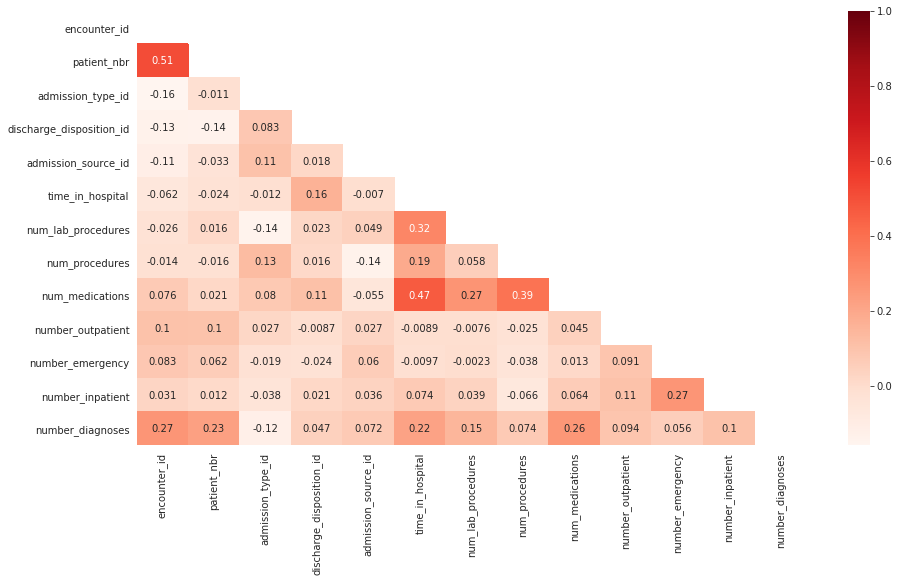

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creamos una función para imprimir la matriz de correlacion.
def printCorrelationMatrix(dataset):
    plt.figure(figsize=(15,8))
    correlation=ds.corr()
    mask = np.zeros_like(correlation)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(correlation, mask=mask,cmap="Bules",annot=True)
        
printCorrelationMatrix(ds)

Como podemos ver no tenemos potenciales correlaciones entre los atributos, ahora analizaremos la distribucion de los datos con un diagrama de caja o boxplot.


####### discharge_disposition_id #######


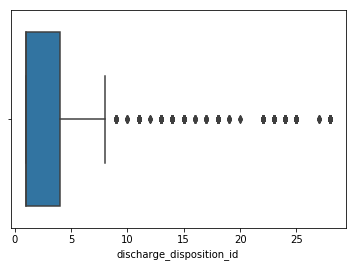


####### admission_type_id #######


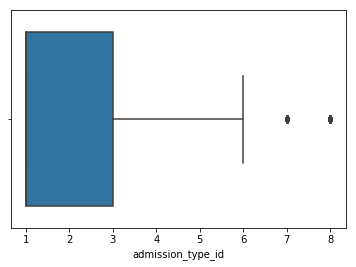


####### admission_source_id #######


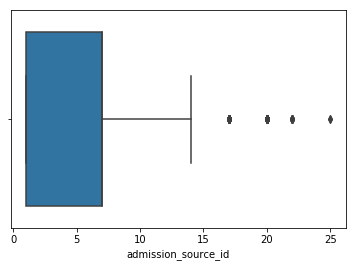


####### time_in_hospital #######


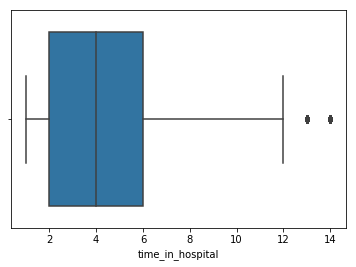


####### num_lab_procedures #######


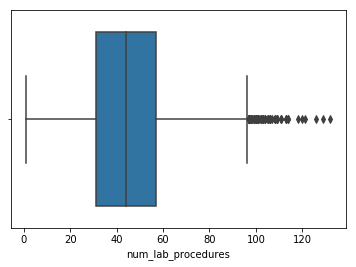


####### num_procedures #######


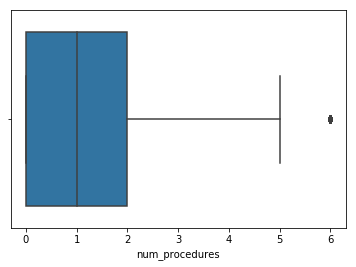


####### num_medications #######


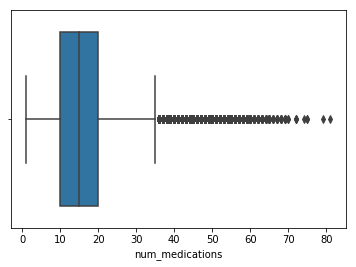


####### number_outpatient #######


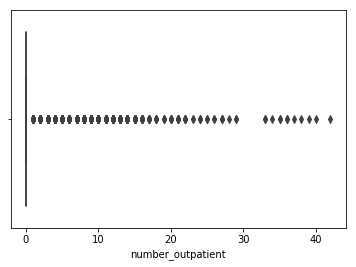


####### number_emergency #######


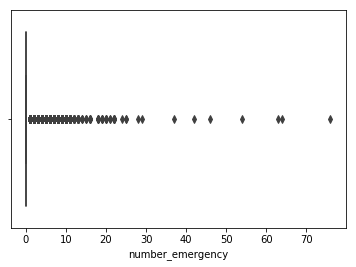


####### number_inpatient #######


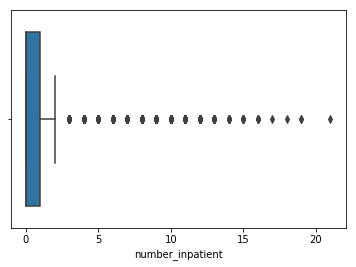


####### number_diagnoses #######


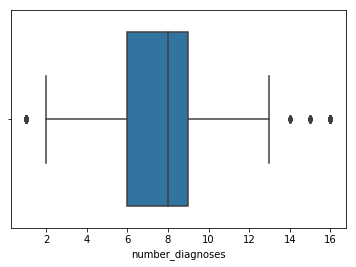

In [135]:
#Ahora vamos a ver los diagramas de caja atribut por atributo, descartanto la clase

def printBoxplot(dataset,columns):
    for column in columns:
        print("\n####### "+str(column)+" #######")
        sns.boxplot(dataset[column])
        plt.show()
        
printBoxplot(ds,['discharge_disposition_id','admission_type_id','admission_source_id','time_in_hospital','num_lab_procedures'
                  ,'num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses'])

In [136]:
ds.quantile([.25,.5,.75,.95])

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0.25,84961194.0,2.341322e+07,1.0,1.0,1.0,2.0,31.0,0.0,10.0,0.0,0.0,0.0,6.0
0.50,152388987.0,4.550514e+07,1.0,1.0,7.0,4.0,44.0,1.0,15.0,0.0,0.0,0.0,8.0
0.75,230270887.5,8.754595e+07,3.0,4.0,7.0,6.0,57.0,2.0,20.0,0.0,0.0,1.0,9.0
0.95,378962843.0,1.114803e+08,6.0,18.0,17.0,11.0,73.0,5.0,31.0,2.0,1.0,3.0,9.0


In [145]:
# Ahora pasaremos todas nuestras variables categorias a numericas

ds.quantile(.95)

admission_type_id            6.0
discharge_disposition_id    18.0
admission_source_id         17.0
time_in_hospital            11.0
num_lab_procedures          73.0
num_procedures               5.0
num_medications             31.0
number_outpatient            2.0
number_emergency             1.0
number_inpatient             3.0
number_diagnoses             9.0
Name: 0.95, dtype: float64